# Salary Prediction Soccer

In [18]:
!kaggle kernels push -p "C:/Users/hp/OneDrive/Content/Blog/sport-analytics/Github/kaggle/out"

Kernel version 17 successfully pushed.  Please check progress at https://www.kaggle.com/agewerc/salarysoccerprediction


#### Import Libraries

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [445]:
soccer_data = pd.read_csv('input/fifa-20-complete-player-dataset/players_20.csv') 

In [446]:
soccer_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### Filter English, Spanish,  German and Italian Teams

In [447]:
EPL_list = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton & Hove Albion', 
            'Burnley', 'Chelsea', 'Crystal Palace','Everton', 'Leicester City', 
            'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 
            'Norwich City', 'Sheffield United', 'Southampton', 'Tottenham Hotspur', 
            'Watford', 'West Ham United', 'Wolverhampton Wanderers']

La_liga_list = ['Real Madrid', 'FC Barcelona', 'Atlético Madrid', 'Sevilla FC', 'Villarreal CF', 'Getafe CF', 
                'Real Socieda', 'Valencia CF', 'Granada CF', 'Athletic Club de Bilbao', 'CA Osasuna', 'Levante UD','Real Betis', 
                'Real Valladolid CF', 'SD Eibar', 'RC Celta', 'Deportivo Alavés', 'RCD Mallorca', 'CD Leganes', 'RCD Espanyol']

Bundesliga_list = ['FC Bayern München', 'Borussia Dortmund' 'RB Leipzig', 'Bayer 04 Leverkusen', 
                   'Borussia Mönchengladbach' , 'TSG 1899 Hoffenheim', 'Hertha BSC', 'VfL Wolfsburg',  
                   'Eintracht Frankfurt', 'FC Schalke 04', 'SC Freiburg', 'FC Augsburg', 'FSV Mainz 05',
                   'SV Werder Bremen', 'FC Köln German', 'Fortuna Düsseldorf', 'FC Union Berlin', 'SC Paderborn 07']

Italian_League_list = ['Juventus', 'Lazio', 'Atalanta', 'Internazionale AS', 'Roma', 'Napoli' ,
                       'Milan', 'Sassuolo', 'Hellas Verona', 'Bologna', 'Cagliari', 'Parma',
                       'Fiorentina', 'Sampdoria', 'Udinese','Torino', 'Genoa','Lecce','Brescia','SPAL']

european_league = EPL_list + La_liga_list+ Bundesliga_list + Italian_League_list


In [448]:
soccer_data['new'] = 0
soccer_data['new'] = soccer_data['club'].apply(lambda x: 1 if x in european_league else 0)

In [449]:
soccer_data = soccer_data[soccer_data['new'] == 1]

#### Filter Data

In [450]:
soccer_data = soccer_data.dropna(axis='columns') # remove NA's
soccer_data = soccer_data[soccer_data['player_positions'] != 'GK'] # remove Goalkeepers
soccer_data = soccer_data.loc[:,~soccer_data.columns.str.contains('^goalkeeping', case=False)] # remove Goalkeepers skills 
soccer_data = soccer_data._get_numeric_data() # remove non-numerical data
soccer_data= soccer_data.drop(columns=['sofifa_id', 'new','team_jersey_number', 'value_eur', 'overall', 'potential'])
soccer_data = soccer_data.reset_index()

#### Data Exploration

In [451]:
soccer_data.columns

Index(['index', 'age', 'height_cm', 'weight_kg', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

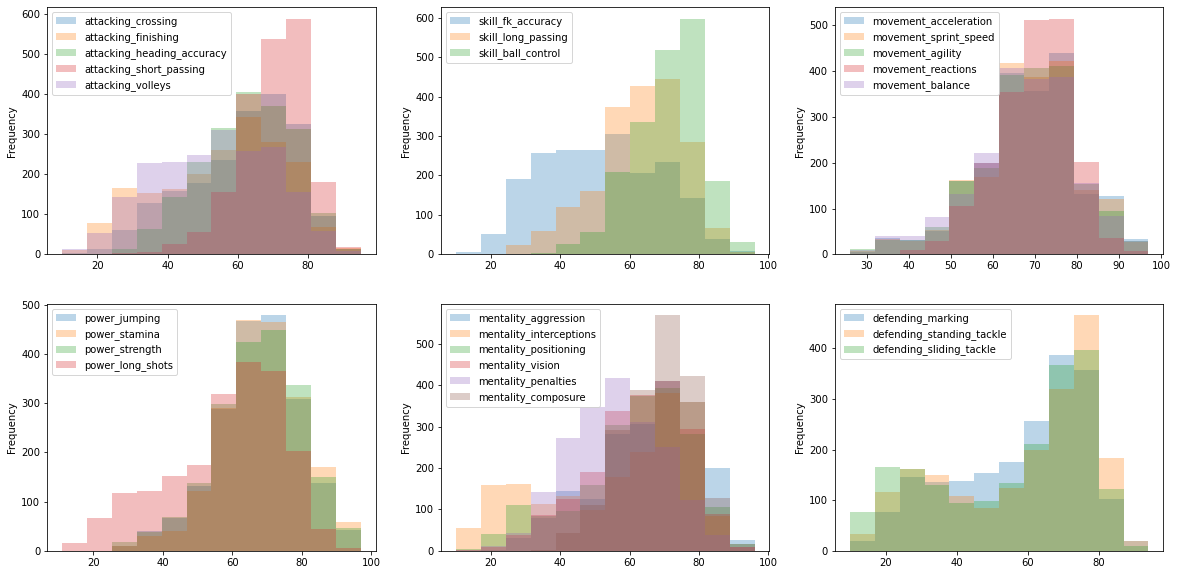

In [452]:
from matplotlib.pyplot import figure

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

soccer_data.loc[:, ['attacking_crossing', 'attacking_finishing', 
                 'attacking_heading_accuracy', 'attacking_short_passing',
                 'attacking_volleys']].plot.hist(bins=12, alpha=0.3, ax=axes[0,0])

soccer_data.loc[:, ['skill_fk_accuracy', 'skill_long_passing', 
                 'skill_ball_control']].plot.hist(bins=12, alpha=0.3, ax=axes[0,1])

soccer_data.loc[:, ['movement_acceleration', 'movement_sprint_speed', 
                 'movement_agility', 'movement_reactions', 
                 'movement_balance']].plot.hist(bins=12, alpha=0.3, ax=axes[0,2])

soccer_data.loc[:, ['power_jumping', 'power_stamina', 'power_strength',
                 'power_long_shots']].plot.hist(bins=12, alpha=0.3, ax=axes[1,0])

soccer_data.loc[:, ['mentality_aggression', 'mentality_interceptions',
                 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                 'mentality_composure']].plot.hist(bins=12, alpha=0.3, ax=axes[1,1])

soccer_data.loc[:, ['defending_marking', 'defending_standing_tackle',
                 'defending_sliding_tackle']].plot.hist(bins=12, alpha=0.3, ax=axes[1,2])

# Salary Analysis

In [453]:
soccer_data['log_wage_eur'] = soccer_data['wage_eur'].apply(np.log)

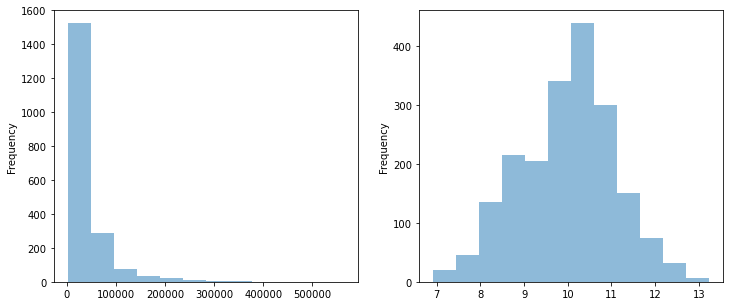

In [454]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

soccer_data.loc[:, 'wage_eur'].plot.hist(bins=12, ax=axes[0], alpha = 0.5)
soccer_data.loc[:, 'log_wage_eur'].plot.hist(bins=12, ax=axes[1], alpha = 0.5)

# Clustering

In [455]:
soccer_data['t'] = soccer_data['wage_eur'].apply(lambda x: 'more' if x > 25000 else 'less')

In [456]:
soccer_data.columns

Index(['index', 'age', 'height_cm', 'weight_kg', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'log_wage_eur', 't'],
      dtype='object')

In [457]:
columns = ['age', 'height_cm', 'weight_kg','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
           'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
           'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
           'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
           'movement_reactions', 'movement_balance', 'power_shot_power',
           'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
           'mentality_aggression', 'mentality_interceptions',
           'mentality_positioning', 'mentality_vision', 'mentality_penalties',
           'mentality_composure', 'defending_marking', 'defending_standing_tackle',
           'defending_sliding_tackle']

In [458]:
from sklearn.preprocessing import StandardScaler
x = soccer_data.loc[:, columns].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [459]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [460]:
soccer_df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])


In [461]:
soccer_df.tail()


,principal component 1,principal component 2
1963,4.062870,4.382211
1964,3.672098,7.142527
1965,4.341033,3.753522
1966,3.396759,6.486814
1967,6.112884,7.093219


<Figure size 432x288 with 0 Axes>

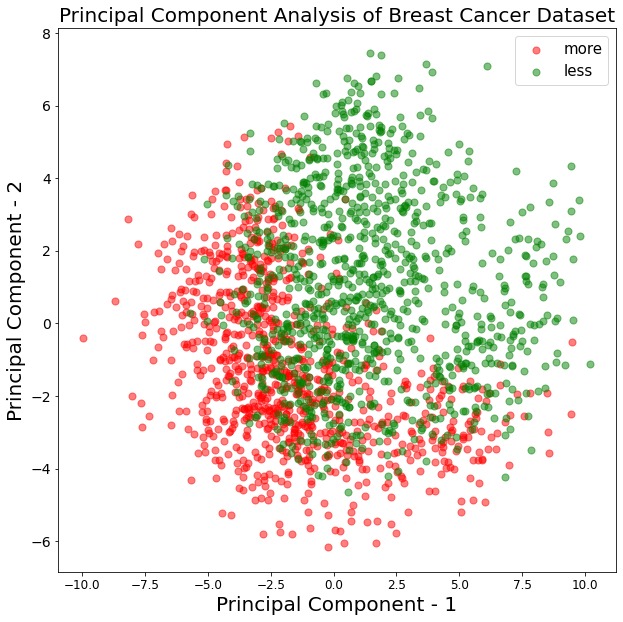

In [462]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['more', 'less']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = soccer_data['t'] == target
    plt.scatter(soccer_df.loc[indicesToKeep, 'principal component 1'], 
                soccer_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50, alpha = 0.5)

plt.legend(targets,prop={'size': 15})

#### Machine Learning

In [463]:
soccer_data

,index,age,height_cm,weight_kg,wage_eur,international_reputation,weak_foot,skill_moves,contract_valid_until,attacking_crossing,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,log_wage_eur,t
0,0,32,170,72,565000,5,4,4,2021.0,88,...,40,94,94,75,96,33,37,26,13.244581,more
1,1,34,187,83,405000,5,4,5,2022.0,84,...,29,95,82,85,95,28,32,24,12.911642,more
2,4,28,175,74,470000,4,4,4,2024.0,81,...,41,87,89,88,91,34,27,22,13.060488,more
3,5,28,181,70,370000,4,5,4,2023.0,93,...,61,88,94,79,91,68,58,51,12.821258,more
4,7,27,193,92,200000,3,3,2,2023.0,53,...,89,47,65,62,89,91,92,85,12.206073,more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,17585,18,180,70,3000,1,3,2,2022.0,42,...,29,46,55,45,62,36,48,51,8.006368,less
1964,17645,20,176,68,5000,1,3,3,2022.0,46,...,21,48,47,55,48,20,25,22,8.517193,less
1965,17852,19,180,70,4000,1,3,2,2020.0,43,...,38,55,49,46,46,44,41,52,8.294050,less
1966,17934,20,182,77,2000,1,2,2,2021.0,42,...,15,44,50,64,43,24,20,16,7.600902,less


In [464]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.log(soccer_data['wage_eur'])
# Remove the labels from the features
# axis 1 refers to the columns
soccer_data = soccer_data.drop('wage_eur', axis = 1)
soccer_data = soccer_data.drop('log_wage_eur', axis = 1)
features = soccer_data.drop('t', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [465]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [466]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(train_features, train_labels);

In [467]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.37 degrees.


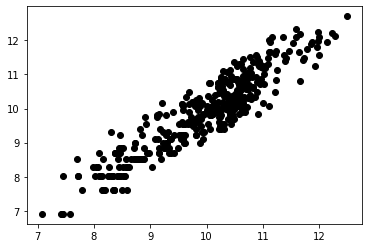

In [468]:
import matplotlib.pyplot as plt
plt.plot(predictions, test_labels, 'o', color='black');